***import all the required libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

***Data understanding***

In [2]:
bike_share = pd.read_csv('day.csv')

In [3]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_share.shape

(730, 16)

In [7]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
dup_rows = bike_share[bike_share.duplicated()]
print(dup_rows.shape)

(0, 16)


***Data Preparation and Cleaning***

In [9]:
delete_list_unrequired = ["instant", "dteday", "casual", "registered"]
bike_share = bike_share.drop(delete_list_unrequired, axis=1)

In [10]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
bike_share_orig = bike_share.copy()

***Create Dummy Variables***

In [12]:
bike_share['season'] = bike_share['season'].astype('category')
bike_share['weathersit'] = bike_share['weathersit'].astype('category')
bike_share['mnth'] = bike_share['mnth'].astype('category')
bike_share['weekday'] = bike_share['weekday'].astype('category')

In [13]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
bike_share = pd.get_dummies(bike_share, drop_first = True)
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [15]:
bike_share.shape

(730, 30)

***Split the data***

In [16]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_share, train_size = 0.70, test_size = 0.30, random_state = 333)

In [17]:
bike_train.shape

(510, 30)

In [18]:
bike_test.shape

(219, 30)

***EDA process***

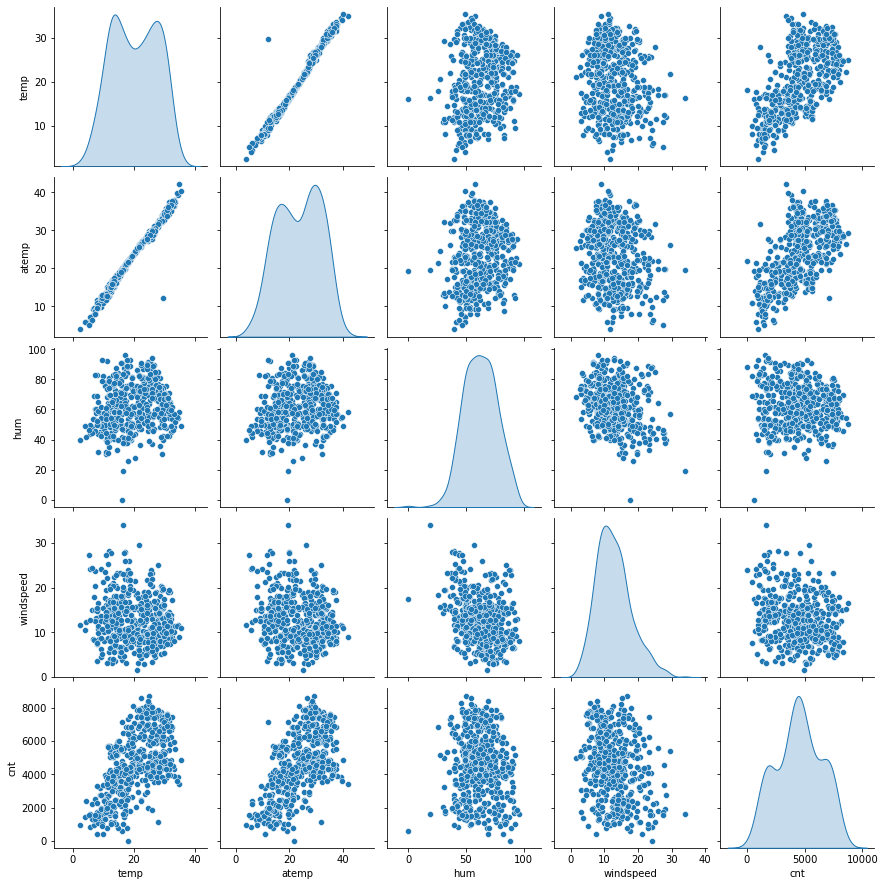

In [19]:
bike_tmp = bike_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(bike_tmp, diag_kind = 'kde')
plt.show()

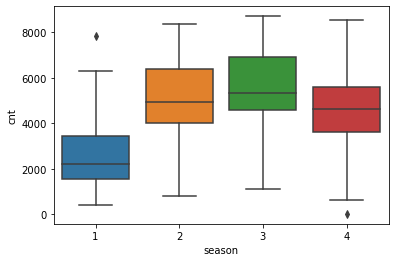

In [20]:
sns.boxplot(data = bike_share_orig, x = 'season', y = 'cnt')
plt.show()

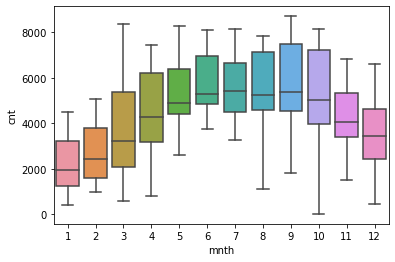

In [21]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_orig)
plt.show()

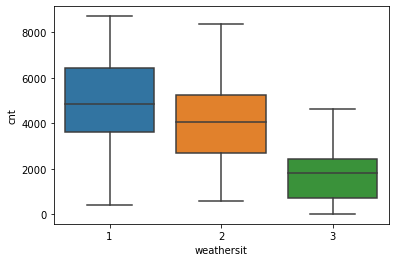

In [22]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_orig)
plt.show()

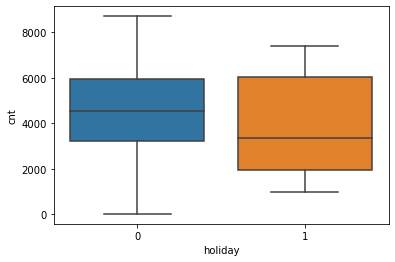

In [23]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_orig)
plt.show()

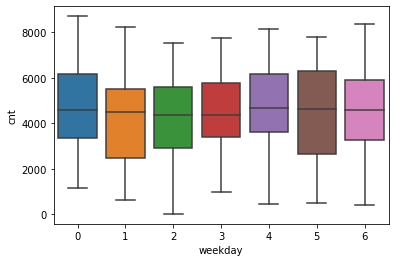

In [24]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_orig)
plt.show()

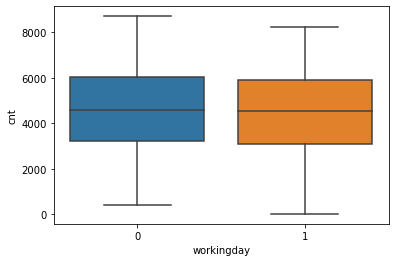

In [25]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_orig)
plt.show()

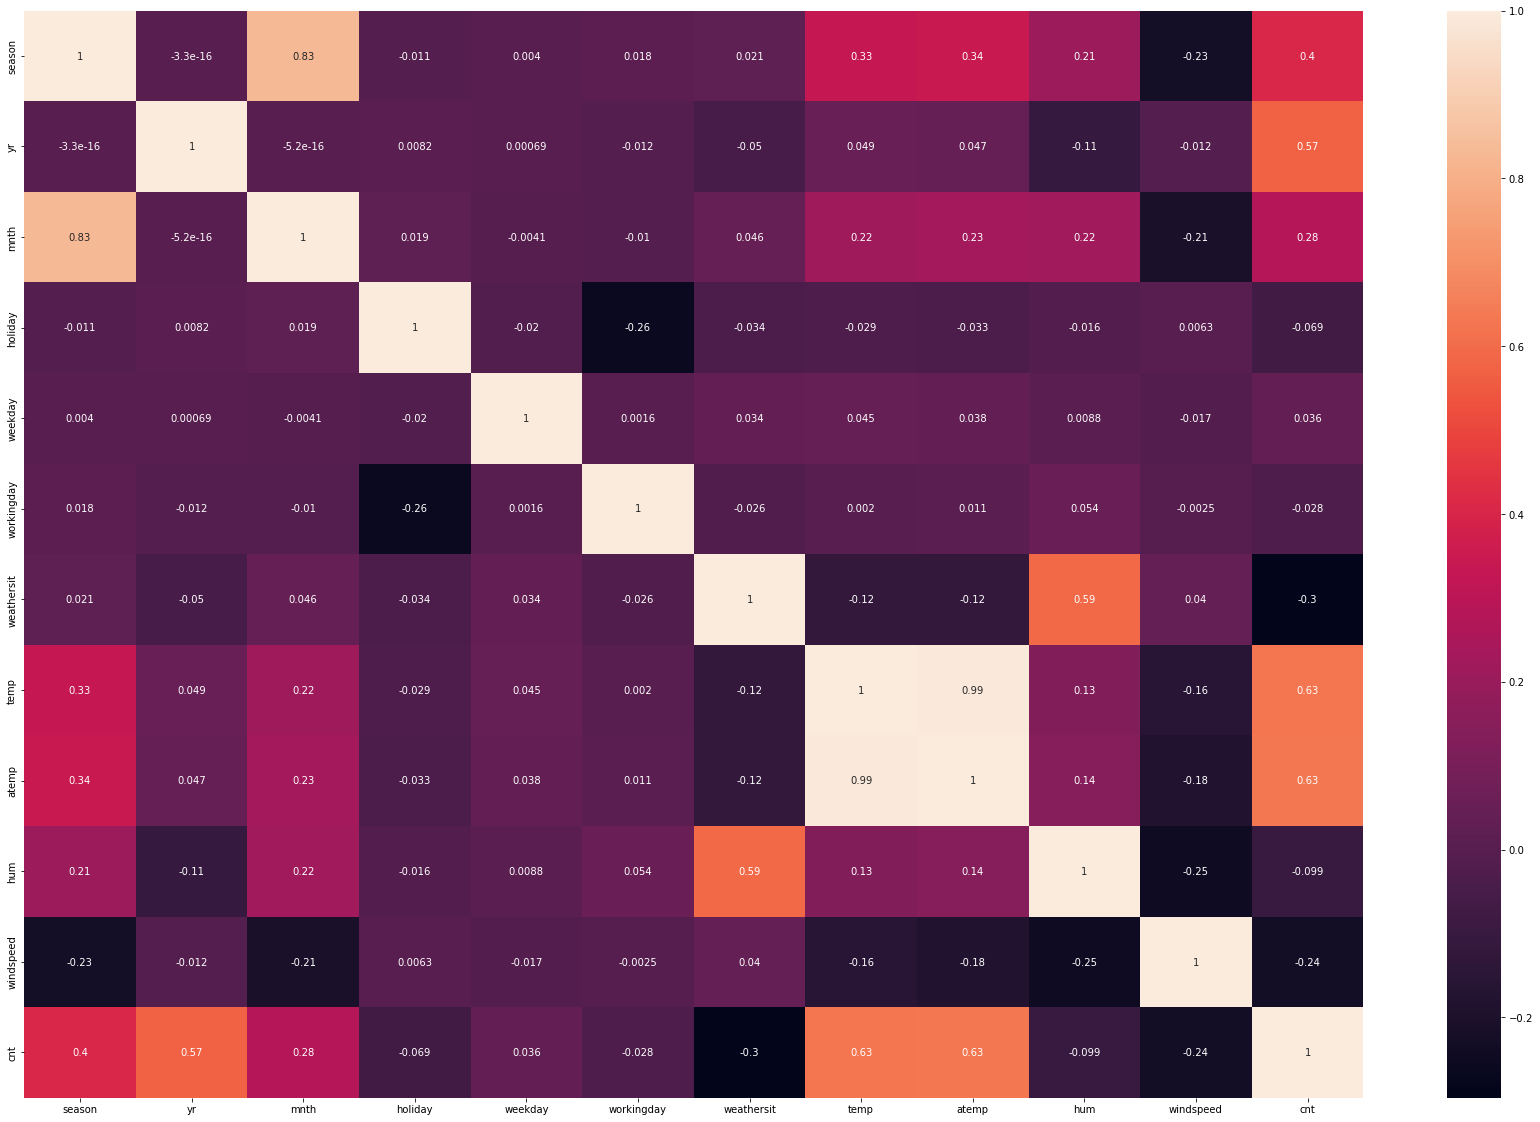

In [26]:
plt.figure(figsize = (30,20))
sns.heatmap(bike_share_orig.corr(), annot = True)
plt.show()


***Resccalling***

In [27]:
scaler = MinMaxScaler()

In [28]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
numeric_feature = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


bike_train[numeric_feature] = scaler.fit_transform(bike_train[numeric_feature])

In [30]:

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Building the model***

In [32]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:

y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [35]:
import statsmodels.api as sm

In [36]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     89.89
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.38e-174
Time:                        20:14:33   Log-Likelihood:                 513.80
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     480   BIC:                            -840.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2426      0.031      7.814      0.000       0.182       0.304
yr               0.2299      0.008     27.726      0.000       0.214       0.246
holiday          0.0234      0.093      0.251      0.802      -0.160       0.206
workingday       0.0618      0.097      0.634      0.526      -0.130       0.253
temp             0.3364      0.144      2.339      0.020       0.054       0.619
atemp            0.1129      0.141      0.801      0.424      -0.164       0.390
hum             -0.1659      0.039     -4.230      0.000      -0.243      -0.089
windspeed       -0.1778      0.029     -6.163      0.000      -0.234      -0.121
season_2         0.1042      0.027      3.900      0.000       0.052       0.157
season_3         0.0946      0.031      3.055      0.002       0.034       0.155
season_4         0.1759      0.026      6.657      0.000       0.124       0.228
mnth_2           0.0166      0.020      0.824      0.410      -0.023       0.056
mnth_3           0.0661      0.023      2.825      0.005       0.020       0.112
mnth_4           0.0377      0.036      1.058      0.291      -0.032       0.108
mnth_5           0.0637      0.039      1.643      0.101      -0.012       0.140
mnth_6           0.0430      0.041      1.058      0.290      -0.037       0.123
mnth_7           0.0011      0.045      0.023      0.981      -0.087       0.089
mnth_8           0.0274      0.043      0.637      0.525      -0.057       0.112
mnth_9           0.1079      0.038      2.835      0.005       0.033       0.183
mnth_10          0.0487      0.035      1.392      0.165      -0.020       0.117
mnth_11         -0.0177      0.033     -0.532      0.595      -0.083       0.048
mnth_12         -0.0105      0.026     -0.398      0.691      -0.062       0.041
weekday_1       -0.0930      0.097     -0.955      0.340      -0.284       0.098
weekday_2       -0.1021      0.097     -1.053      0.293      -0.293       0.088
weekday_3       -0.0829      0.097     -0.856      0.392      -0.273       0.107
weekday_4       -0.0651      0.097     -0.668      0.505      -0.257       0.126
weekday_5       -0.0683      0.097     -0.702      0.483      -0.259       0.123
weekday_6        0.0018      0.015      0.121      0.904      -0.028       0.032
weathersit_2    -0.0498      0.011     -4.585      0.000      -0.071      -0.028
weathersit_3    -0.2712      0.029     -9.368      0.000      -0.328      -0.214
==============================================================================
Omnibus:                       84.187   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.537
Skew:                          -0.848   Prob(JB):                     3.85e-45
Kurtosis:                       5.598   Cond. No.                         116.
===============

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,438.14
2,workingday,403.35
4,atemp,379.52
22,weekday_2,88.37
25,weekday_5,85.56
21,weekday_1,83.40
24,weekday_4,81.28
23,weekday_3,75.76
5,hum,23.14
8,season_3,15.48


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)


rfe =RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [41]:
X_train_rfe = X_train[col]

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


***Model assessment and Prediction***

In [43]:
X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [44]:

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.36e-185
Time:                        20:14:34   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437      0.000       0.183       0.293
yr               0.2288      0.008     27.884      0.000       0.213       0.245
temp             0.3943      0.135      2.921      0.004       0.129       0.659
atemp            0.0887      0.138      0.642      0.521      -0.183       0.360
hum             -0.1710      0.038     -4.541      0.000      -0.245      -0.097
windspeed       -0.1799      0.028     -6.400      0.000      -0.235      -0.125
season_2         0.1324      0.015      8.669      0.000       0.102       0.162
season_3         0.0853      0.021      4.063      0.000       0.044       0.127
season_4         0.1525      0.014     10.648      0.000       0.124       0.181
mnth_3           0.0471      0.016      2.940      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.302      0.000       0.069       0.132
mnth_10          0.0557      0.018      3.101      0.002       0.020       0.091
weekday_1       -0.0243      0.012     -2.055      0.040      -0.047      -0.001
weekday_2       -0.0368      0.011     -3.218      0.001      -0.059      -0.014
weathersit_2    -0.0477      0.011     -4.450      0.000      -0.069      -0.027
weathersit_3    -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       93.066   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.298
Skew:                          -0.933   Prob(JB):                     1.19e-49
Kurtosis:                       5.668   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_data = X_train_rfe.drop(["atemp"], axis = 1)

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [47]:
X_train_lm_2 = sm.add_constant(X_train_data)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        20:14:34   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509      0.000       0.184       0.295
yr               0.2288      0.008     27.898      0.000       0.213       0.245
temp             0.4782      0.034     14.154      0.000       0.412       0.545
hum             -0.1702      0.038     -4.525      0.000      -0.244      -0.096
windspeed       -0.1834      0.028     -6.652      0.000      -0.238      -0.129
season_2         0.1326      0.015      8.686      0.000       0.103       0.163
season_3         0.0838      0.021      4.019      0.000       0.043       0.125
season_4         0.1528      0.014     10.689      0.000       0.125       0.181
mnth_3           0.0473      0.016      2.956      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.308      0.000       0.069       0.132
mnth_10          0.0558      0.018      3.109      0.002       0.021       0.091
weekday_1       -0.0239      0.012     -2.028      0.043      -0.047      -0.001
weekday_2       -0.0365      0.011     -3.196      0.001      -0.059      -0.014
weathersit_2    -0.0479      0.011     -4.474      0.000      -0.069      -0.027
weathersit_3    -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       92.167   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.631
Skew:                          -0.925   Prob(JB):                     4.53e-49
Kurtosis:                       5.655   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X_train_data = X_train_data.drop(["hum"], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)
X_train_lm_2 = sm.add_constant(X_train_data)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lr_2.summary())

        Features    VIF
1           temp  15.20
4       season_3   6.69
2      windspeed   3.89
3       season_2   3.51
5       season_4   2.89
0             yr   2.01
8        mnth_10   1.66
11  weathersit_2   1.51
7         mnth_9   1.27
10     weekday_2   1.21
6         mnth_3   1.19
9      weekday_1   1.18
12  weathersit_3   1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.86e-183
Time:                        20:14:34   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                       

In [49]:
X_train_data = X_train_data.drop(["season_3"], axis = 1)

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_data.columns
vif['VIF'] = [variance_inflation_factor(X_train_data.values, i) for i in range(X_train_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)
X_train_lm_3 = sm.add_constant(X_train_data)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

        Features   VIF
1           temp  4.05
2      windspeed  3.72
0             yr  2.00
4       season_4  1.94
7        mnth_10  1.63
3       season_2  1.56
10  weathersit_2  1.50
6         mnth_9  1.23
9      weekday_2  1.21
8      weekday_1  1.18
5         mnth_3  1.14
11  weathersit_3  1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.66e-180
Time:                        20:14:34   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                

In [51]:
lr_3.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

In [52]:
y_train_pred = lr_3.predict(X_train_lm_3)

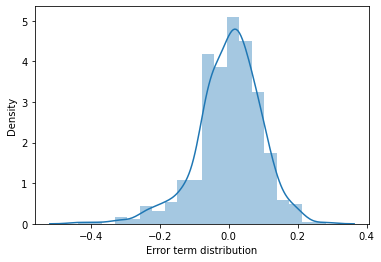

In [53]:
residual = y_train - y_train_pred
fig = plt.figure()
sns.distplot((residual), bins = 20)
plt.xlabel("Error term distribution")
plt.show()

In [54]:
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [55]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[numeric_var] = scaler.transform(bike_test[numeric_var])

In [56]:

bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [57]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [59]:
col1 = X_train_data.columns
X_test = X_test[col1]

X_test_lm_3 = sm.add_constant(X_test)

X_test_lm_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_3        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   mnth_10       219 non-null    uint8  
 9   weekday_1     219 non-null    uint8  
 10  weekday_2     219 non-null    uint8  
 11  weathersit_2  219 non-null    uint8  
 12  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 10.5 KB


In [60]:
y_pred = lr_3.predict(X_test_lm_3)

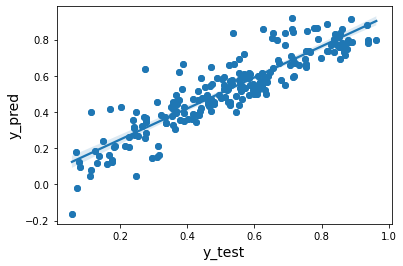

In [61]:
plt.figure()
plt.scatter(y_test, y_pred)
sns.regplot(x = y_test, y = y_pred)                      
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 14)                       
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8071985470347911


In [63]:
n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)





0.795967394434876


***Final Adjusted R2 -> 0.795967394434876***

In [64]:

lr_3.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

***The linear regression model suggest the following are the 3 major indicator to predict the bike hire***

**Temp** : Temperature with highest value of coefficient of '0.564492' indicates the a unit increase in temperature will increse the bike hires by 0.564492 units.**

**Yr** : Year with second highest coefficient value indicate each year to year potential grow in the number of bike hire by '0.231122' units

**weathersit_3**: Weather situation 3 indicates the negative correlation means with a unit increase in weather_sit3 there is a decrease in the bike hire by 0.315252 units

***To increase the number of Bike hire it is suggested to consider the above key features and also the follwing features***

**windspeed**: A coefficient value of ‘-0.151266’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.
**season_4 (winter)**: A coefficient value of ‘0.117244’ indicated that w.r.t season_4, a unit increase in season_4 variable increases the bike hire numbers by 0.117244 units.